# 🚀 **Feature selection**

La selección de características es el proceso de reducir el número de variables de entrada al desarrollar un modelo predictivo.

Es deseable reducir el número de variables de entrada para reducir el costo computacional del modelado y, en algunos casos, para mejorar el rendimiento del modelo.

> *La selección de funciones se centra principalmente en eliminar predictores no informativos o redundantes del modelo.*
> 
> ✏️ Página 488, Modelado predictivo aplicado, 2013.

> *Muchos modelos, especialmente aquellos basados ​​en pendientes e intersecciones de regresión, estimarán parámetros para cada término del modelo. Debido a esto, la presencia de variables no informativas puede agregar incertidumbre a las predicciones y reducir la efectividad general del modelo.*
> 
> ✏️ Página 488, Modelado predictivo aplicado, 2013.

\

# 📈 **Statistics for feature selection**

Los métodos de selección de características basados en estadísticas implican evaluar la relación entre cada variable de entrada y la variable de destino utilizando estadísticas y seleccionando aquellas variables de entrada que tienen la relación más fuerte con la variable de destino. Estos métodos pueden ser rápidos y efectivos, aunque la elección de medidas estadísticas depende del tipo de datos de las variables de entrada y salida.

\

# 🔀 **Supervised and unsupervised**

> *Una distinción importante que se debe hacer en la selección de características es la de los métodos supervisados y no supervisados. Cuando se ignora el resultado durante la eliminación de predictores, la técnica no está supervisada.*
> 
> ✏️ Página 488, Modelado predictivo aplicado, 2013.

La diferencia tiene que ver con si las funciones se seleccionan en función de la variable de destino o no. Las técnicas de selección de características no supervisadas ignoran la variable de destino, como los métodos que eliminan las variables redundantes mediante la correlación. Las técnicas de selección de características supervisadas utilizan la variable de destino, como métodos que eliminan variables irrelevantes.

\

# 🌀 **Filter, wrapper and intrinsec**

> *Los métodos de envoltura evalúan múltiples modelos mediante procedimientos que agregan o eliminan predictores para encontrar la combinación óptima que maximiza el rendimiento del modelo.*
> 
> ✏️ Página 490, Modelado predictivo aplicado, 2013.


> *… algunos modelos contienen una selección de características incorporada, lo que significa que el modelo solo incluirá predictores que ayuden a maximizar la precisión. En estos casos, el modelo puede elegir qué representación de los datos es la mejor.*
> 
> ✏️ Página 28, Modelado predictivo aplicado, 2013.

\

<div align="center">
  <img src="https://editor.analyticsvidhya.com/uploads/84353IMAGE1.png" />
</div>

\

# 🌐 **Dimensionally reduction**

La selección de características también está relacionada con las técnicas de reducción dimensional, ya que ambos métodos buscan menos variables de entrada para un modelo predictivo. **La diferencia es que la selección de características selecciona características para mantenerlas o eliminarlas del conjunto de datos, mientras que la reducción de la dimensionalidad crea una proyección de los datos que da como resultado características de entrada completamente nuevas.** 

Como tal, la reducción de la dimensionalidad es una alternativa a la selección de funciones en lugar de un tipo de selección de funciones.

\


\

<div align="center">
  <img src="https://machinelearningmastery.com/wp-content/uploads/2019/11/Overview-of-Feature-Selection-Techniques3.png" />
</div>

\

---

\

# 🛸 **Filter methods**

\

## 💱 **Numerical and categorical I/O**

Las variables de entrada (Input) son aquellas que se proporcionan como entrada a un modelo. En la selección de características, es este grupo de variables el que deseamos reducir de tamaño. Las variables de salida (Output) son aquellas para las que un modelo pretende predecir, a menudo llamadas variables de respuesta.

El tipo de variable de respuesta normalmente indica el tipo de problema de modelado predictivo que se está realizando. **Por ejemplo, una variable de salida numérica indica un problema de modelado predictivo de regresión y una variable de salida categórica indica un problema de modelado predictivo de clasificación.**

> *La mayoría de estas técnicas son univariadas, lo que significa que evalúan cada predictor de forma aislada. En este caso, la existencia de predictores correlacionados permite seleccionar predictores importantes, pero redundantes. Las consecuencias obvias de este problema son que se eligen demasiados predictores y, como resultado, surgen problemas de colinealidad.*
> 
> ✏️ Página 499, Modelado predictivo aplicado, 2013.


<div align="center">
  <img src="https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png" />
</div>

\

## 📚️ **Examples**

\

### **Get feature statistics**

La selección de características univariante funciona seleccionando las mejores características en función de pruebas estadísticas univariadas. Puede verse como un paso de preprocesamiento a un estimador. Scikit-learn expone las rutinas de selección de funciones como objetos que implementan el método de transformación.

**SelectKBest.** elimina todas las *k* características excepto las de puntuación más alta.

**SelectPercentile.** elimina todas las características menos un porcentaje de puntuación más alto especificado por el usuario.

```
selectKBest = SelectKBest(score_func=f_regression, k=10)
selected_features = selectKBest.fit_transform(X, y)
```

\

### 🇨 **Classification methods**

#### ✳️ **Pearson's Regression**

El coeficiente de correlación de Pearson's es una medida de correlación lineal entre dos conjuntos de datos. 

Es el cociente entre la covarianza de dos variables y el producto de sus desviaciones estándar; por lo tanto, es esencialmente una medida normalizada de la covarianza, de modo que el resultado siempre tiene un valor entre −1 y 1. Al igual que con la covarianza misma, la medida solo puede reflejar una correlación lineal de variables e ignora muchos otros tipos de relaciones o correlaciones. 

Como ejemplo simple, uno esperaría que la edad y la estatura de una muestra de adolescentes de una escuela secundaria tuvieran un coeficiente de correlación de Pearson significativamente mayor que 0, pero menor que 1 (ya que 1 representaría una correlación irrealmente perfecta). (Pearson correlation coefficient, Wikipedia)






In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def bar_sub_plot(result, name, attributes):
    """
    Plot bar graphic
    """
    tree_importance_sorted_idx = np.argsort(result)
    tree_importance_sorted = result[tree_importance_sorted_idx]

    np_attributes = np.array(attributes)
    attributes_sorted = np_attributes[tree_importance_sorted_idx]

    fig = plt.figure(figsize=(10, 5))
    plt.barh(attributes_sorted, tree_importance_sorted, color='maroon')

    plt.xlabel("Importancia")
    plt.ylabel("Atributo")
    plt.title(f"Method [{name}]")
    plt.show()

In [ ]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import pandas as pd

n_features = 10
X, y = make_regression(n_samples=100, n_features=n_features, n_informative=10)
X = pd.DataFrame(X, columns=[f'F{i+1}' for i in range(n_features)])
X.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,0.260528,-1.060814,0.536685,0.762152,2.526770,1.842830,0.714078,-0.952689,-0.441580,2.149702
1,0.539771,-1.798074,0.287649,-0.575030,-0.633133,0.165441,0.968617,0.922850,-1.067553,-0.204496
2,-0.113258,0.577437,0.241000,-1.265472,-0.038980,0.911894,0.657818,-0.043921,1.946453,1.311204
3,-0.329013,-0.248658,1.105567,0.647916,1.785265,1.369960,0.855055,0.082192,-0.633248,1.040031
4,0.621908,0.078603,0.493561,-2.161868,2.817360,-0.789495,0.775990,0.781599,-0.755788,-0.931714


Shape: (100, 5)
Columns: Index(['F1', 'F2', 'F4', 'F5', 'F7'], dtype='object')


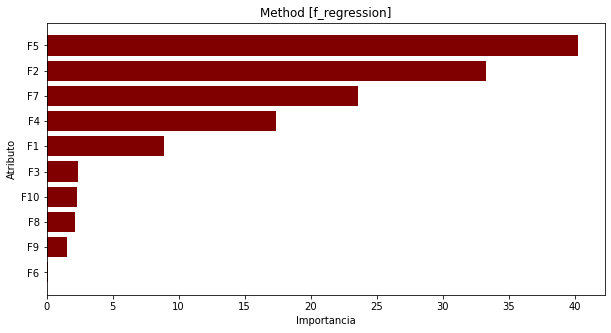

In [ ]:
k_best = 5
select_k_best_f_regression = SelectKBest(score_func=f_regression, k=k_best)
X_selected_features = select_k_best_f_regression.fit_transform(X, y)
binarized_selected_columns = select_k_best_f_regression.get_support()

print(f'Shape: {X_selected_features.shape}')
print(f'Columns: {X.columns[binarized_selected_columns]}')

bar_sub_plot(select_k_best_f_regression.scores_, 'f_regression', X.columns)


#### ✳️ **Anova (Analysis Of Variance)**

**Impacto de la varianza.** La varianza es la medida de la dispersión entre los números de una variable. Mide qué tan lejos está un número de la media y cada número en una variable.

La varianza de una característica determina cuánto afecta a la variable de respuesta. Si la varianza es baja, implica que esta característica no tiene impacto en la respuesta y viceversa.

El análisis de varianza es un método estadístico que se utiliza para verificar las medias de dos o más grupos que son significativamente diferentes entre sí. Asume la hipótesis como

**H0.** Las medias de todos los grupos son iguales.

**H1.** Al menos una media de los grupos son diferentes.

En ANOVA, compararemos la variabilidad entre grupos con la variabilidad dentro del grupo.


In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd

n_features = 10
X, y = make_classification(n_samples=100, n_features=n_features, n_informative=2)
X = pd.DataFrame(X, columns=[f'F{i+1}' for i in range(n_features)])
X.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,0.515624,-0.858750,-0.284496,-2.057099,0.063360,-1.719684,-2.345585,-3.414423,0.938589,-0.136293
1,-1.086006,0.531771,-0.582821,1.802740,0.646954,1.326287,1.250714,2.301467,0.262151,0.951910
2,-1.044387,0.588907,-0.220371,1.475166,-0.738448,1.188237,1.481832,2.276684,1.782919,0.962020
3,-0.493646,-0.982101,1.139100,0.765266,1.256574,0.729206,1.270920,1.612083,1.468660,0.521985
4,-0.757878,0.471666,1.640863,1.489500,-1.760946,0.460885,-1.793745,-0.524860,-0.662513,0.873736


Shape: (100, 5)
Columns: Index(['F5', 'F6', 'F7', 'F8', 'F9'], dtype='object')


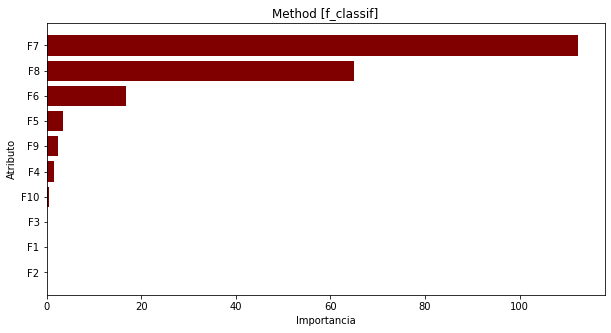

In [ ]:
k_best = 5
select_k_best_f_classif = SelectKBest(score_func=f_classif, k=k_best)
X_selected_features = select_k_best_f_classif.fit_transform(X, y)
binarized_selected_columns = select_k_best_f_classif.get_support()

print(f'Shape: {X_selected_features.shape}')
print(f'Columns: {X.columns[binarized_selected_columns]}')

bar_sub_plot(select_k_best_f_classif.scores_, 'f_classif', X.columns)

#### ✳️ **Chi-Squared**

Una prueba de chi-cuadrado se usa en estadística para probar la independencia de dos eventos. Dados los datos de dos variables, podemos obtener el conteo observado O y el conteo esperado E. Chi-Square mide cómo el conteo esperado E y el conteo observado O se desvían entre sí.

\

<div align="center">
  <img src="https://miro.medium.com/max/532/1*S8rfFkmLhDbOz4RGNwuz6g.png" />
</div>

\

Consideremos un escenario en el que necesitamos determinar la relación entre la característica de categoría independiente (predictor) y la característica de categoría dependiente (respuesta). En la selección de características, nuestro objetivo es seleccionar las características que dependen en gran medida de la respuesta.

**H0.** Dos variables son independientes.

**H1.** Dos variables no son independientes.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd

iris_data = load_iris()
X = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
y = iris_data['target']
X.head()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Shape: (150, 2)
Columns: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


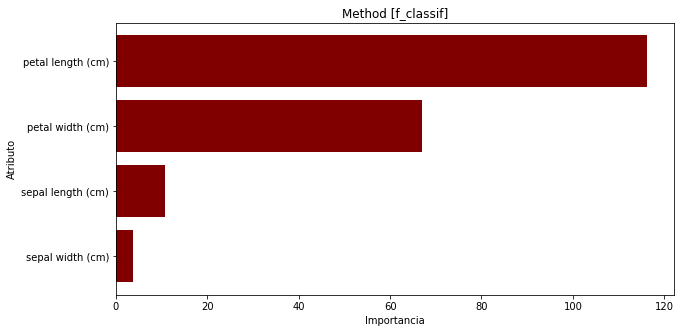

In [ ]:
k_best = 2
select_k_best_chi2 = SelectKBest(chi2, k=k_best)
X_selected_features = select_k_best_chi2.fit_transform(X, y)
binarized_selected_columns = select_k_best_chi2.get_support()

print(f'Shape: {X_selected_features.shape}')
print(f'Columns: {X.columns[binarized_selected_columns]}')
bar_sub_plot(select_k_best_chi2.scores_, 'f_classif', X.columns)

#### ✳️ **Mutual information**

La información mutua se parece mucho a la correlación en el sentido de que mide una relación entre dos cantidades. La ventaja de la información mutua es que puede detectar cualquier tipo de relación, mientras que la correlación solo detecta relaciones lineales.

*   Fácil de usar e interpretar,
*   Computacionalmente eficiente,
*   Teóricamente bien fundamentado,
*   Resistente al sobreajuste, y,
*   Capaz de detectar cualquier tipo de relación



<div align="center">
  <img src="https://i.imgur.com/Dt75E1f.png" />
</div>


La información mutua describe las relaciones en términos de incertidumbre. La información mutua (MI) entre dos cantidades es una medida de la medida en que el conocimiento de una cantidad reduce la incertidumbre sobre la otra. Si supiera el valor de una característica, ¿cuánta más confianza tendría sobre el objetivo?

**Interpretación de puntajes de información mutua.** La mínima información mutua posible entre cantidades es 0.0. Cuando MI es cero, las cantidades son independientes: ninguna puede decir nada sobre la otra. Por el contrario, en teoría, no hay un límite superior para lo que puede ser MI. En la práctica, aunque los valores por encima de 2,0 son poco comunes. (La información mutua es una cantidad logarítmica, por lo que aumenta muy lentamente).



In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

iris_data = load_iris()
X = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
y = iris_data['target']
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Shape: (150, 2)
Columns: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


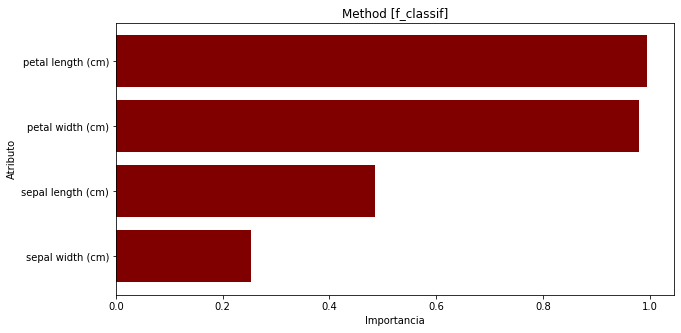

In [ ]:
k_best = 2
select_k_best_mutual_info_classifier = SelectKBest(mutual_info_classif, k=k_best)
X_selected_features = select_k_best_mutual_info_classifier.fit_transform(X, y)
binarized_selected_columns = select_k_best_mutual_info_classifier.get_support()

print(f'Shape: {X_selected_features.shape}')
print(f'Columns: {X.columns[binarized_selected_columns]}')
bar_sub_plot(select_k_best_mutual_info_classifier.scores_, 'f_classif', X.columns)

\

# 🛸 **Wrapper methods**

\
Los métodos wrapper consideran la selección de un conjunto de características como un problema de búsqueda, donde se preparan, evalúan y comparan diferentes combinaciones con otras combinaciones. Se utiliza un modelo predictivo para evaluar una combinación de características y asignar una puntuación basada en la precisión del modelo.

Sigue un enfoque de **búsqueda codicioso** al evaluar todas las posibles combinaciones de características contra el criterio de evaluación . El criterio de evaluación es simplemente la medida de desempeño que depende del tipo de problema, por ejemplo, para la regresión , el criterio de evaluación puede ser valores p, R-cuadrado, R-cuadrado ajustado, de manera similar, para la clasificación , el criterio de evaluación puede ser exactitud, precisión, recuperación. , f1-score, etc. Finalmente, selecciona la combinación de características que da los resultados óptimos para el algoritmo de aprendizaje automático especificado.


\

<div align="center">
  <img src="https://editor.analyticsvidhya.com/uploads/46072IMAGE2.gif" />
</div>

\


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()
boston['data'].shape
bos = pd.DataFrame(boston['data'],columns = boston['feature_names'])
bos['Price'] = boston.target
X = bos.drop("Price", 1)       # feature matrix
y = bos['Price']               # target feature
X.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### ✳️ **La técnica de selección hacia adelante son los siguientes.**

Es un método iterativo en el que comenzamos sin tener ninguna característica en el modelo. En cada iteración, seguimos agregando la función que mejor mejora nuestro modelo hasta que la adición de una nueva variable no mejore el rendimiento del modelo.

1. Elija un nivel de significación (por ejemplo, SL = 0,05 con un 95 % de confianza).

2. Ajuste todos los modelos de regresión simple posibles considerando una característica a la vez. Los modelos 'n' totales son posibles. Seleccione la función con el valor p más bajo .

3. Ajuste todos los modelos posibles con una función adicional añadida a las funciones seleccionadas anteriormente.

4. Nuevamente, seleccione la función con un valor p mínimo . Si p_value < nivel de significación, vaya al Paso 3, de lo contrario termine el proceso.

In [ ]:
import statsmodels.api as sm

def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning

['LSTAT',
 'RM',
 'PTRATIO',
 'DIS',
 'NOX',
 'CHAS',
 'B',
 'ZN',
 'CRIM',
 'RAD',
 'TAX']

# **2.Implementando la selección hacia adelante usando funciones integradas en Python:**

Eliminación hacia atrás (Backward Selection): comenzamos con todas las características y eliminamos la característica menos significativa en cada iteración, lo que mejora el rendimiento del modelo. Repetimos esto hasta que no se observe ninguna mejora en la eliminación de características

In [ ]:
#importación de las bibliotecas necesarias
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)

from sklearn.feature_selection import SequentialFeatureSelector

sfs_forward = SequentialFeatureSelector(
    LinearRegression(), 
    n_features_to_select=11, 
    direction="forward",
    scoring ='r2'
).fit(X, y)

sfs_backward = SequentialFeatureSelector(LinearRegression(), n_features_to_select=11, direction="backward",scoring ='r2').fit(X, y)
feature_names =pd.Series(np.array(X.columns))
columns=sfs_backward.get_support()
print( "Características seleccionadas por selección secuencial directa: "f"{feature_names[columns]}")

print("Características seleccionadas por selección secuencial hacia atrás: " f"{feature_names[columns]}")


Características seleccionadas por selección secuencial directa: 0        CRIM
1          ZN
3        CHAS
4         NOX
6         AGE
7         DIS
8         RAD
9         TAX
10    PTRATIO
11          B
12      LSTAT
dtype: object
Características seleccionadas por selección secuencial hacia atrás: 0        CRIM
1          ZN
3        CHAS
4         NOX
6         AGE
7         DIS
8         RAD
9         TAX
10    PTRATIO
11          B
12      LSTAT
dtype: object


# **3.** **Eliminación bidireccional (selección paso a paso)** 
Es similar a la selección hacia adelante, pero la diferencia es que al agregar una nueva función, también verifica la importancia de las funciones ya agregadas y si encuentra que alguna de las funciones ya seleccionadas es insignificante, simplemente elimina esa función en particular mediante la eliminación hacia atrás .


Por lo tanto, es una combinación de selección hacia adelante y eliminación hacia atrás .

En resumen, los pasos involucrados en la eliminación bidireccional son los siguientes:

1.Elija un nivel de significación para entrar y salir del modelo (por ejemplo, SL_in = 0,05 y SL_out = 0,05 con un 95 % de confianza).

2.Realice el siguiente paso de selección hacia adelante (la función recién agregada debe tener un valor p < SL_in para ingresar).

3.Realice todos los pasos de eliminación hacia atrás (cualquier característica agregada previamente con valor p > SL_out está lista para salir del modelo).

4.Repita los pasos 2 y 3 hasta que obtengamos un conjunto óptimo final de características.

Hagamos lo mismo con los datos del precio de la vivienda en Boston.

In [ ]:
import pandas  as pd
import numpy as np
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv',index_col=0)
test_data  = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv',index_col=0)
target     = 'SalePrice'
X_train = train_data.select_dtypes(include=['number']).copy()
X_train = X_train.drop([target], axis=1)
y_train = train_data[target]
X_test  = test_data.select_dtypes(include=['number']).copy()
X_train = X_train.fillna(X_train.mean())
X_test  = X_test.fillna(X_test.mean())
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, max_depth=10)
from sklearn.feature_selection import RFE
# here we want only one final feature, we do this to produce a ranking
n_features_to_select = 1
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)
from operator import itemgetter
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)
    n_features_to_select = 10
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)
predictions = rfe.predict(X_test)
output = pd.DataFrame({"Id":test_data.index, target:predictions})
output.to_csv('submission.csv', index=False)

FileNotFoundError: ignored

## ⚾ Integrated Methods

Combina las cualidades de los métodos de filtro y envoltura. Se implementa mediante algoritmos que tienes sus propios métodos de selección de características incorporados. 

Algunos de los ejemplos más populares de estos métodos son la regresión LASSO y RIDGE, que tienen funciones de penalización incorporadas para reducir el sobreajuste.

## 🐾Regresión de Lasso y  Ridge

En Python, la regresión de Lasso se puede realizar utilizando la clase Lasso de la biblioteca sklearn.linear_model. La clase Lasso toma un parámetro llamado alfa que representa la fuerza del término de regularización. Un valor alfa más alto da como resultado una penalización más fuerte y, por lo tanto, se utilizan menos características en el modelo. En otras palabras, un valor alfa más alto, como 1,0, hace que se eliminen más funciones del modelo que un valor como 0,1. La clase Lasso también tiene un método fit() que se puede usar para ajustar el modelo a los datos de entrenamiento y un método predict() que se puede usar para hacer predicciones sobre nuevos datos.

In [ ]:
# evaluate an lasso regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso, Ridge

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

# define model lasso
model = Lasso(alpha=1.0)
# define model rifge
#model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores) 
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores))) 